# ***This project is spam detection ***

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r'C:\Users\singh\OneDrive\Desktop\spam_detection-22\spam_ham_dataset.csv')

In [4]:
df.head()

,category,message
0,ham,Thanks for your help yesterday.
1,ham,I'll call you in the evening to discuss.
2,ham,Thanks for your help yesterday.
3,ham,"Hey, are we still on for dinner tonight?"
4,ham,Can you send me the updated file?


In [5]:
df.shape

(3000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3000 non-null   object
 1   message   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [7]:
df.isnull().value_counts()

category  message
False     False      3000
Name: count, dtype: int64

In [8]:
from  sklearn.preprocessing  import LabelEncoder
encoder=LabelEncoder()
df['category']=encoder.fit_transform(df['category'])

In [9]:
encoder.fit_transform(df['category'])

array([0, 0, 0, ..., 1, 1, 1], shape=(3000,))

In [10]:
df.head(5)

,category,message
0,0,Thanks for your help yesterday.
1,0,I'll call you in the evening to discuss.
2,0,Thanks for your help yesterday.
3,0,"Hey, are we still on for dinner tonight?"
4,0,Can you send me the updated file?


In [11]:
df.duplicated().sum()

np.int64(2980)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.sample(5)

,category,message
37,1,Your account has been suspended. Verify now.
3,0,"Hey, are we still on for dinner tonight?"
34,1,Limited offer! Buy now and get 50% off.
12,1,Congratulations! You've won a $1000 gift card....
25,0,Happy Birthday! Wishing you a wonderful day.


In [15]:
df.shape

(20, 2)

# ***Now performing EDA method of data set ***

In [16]:
df['category'].value_counts()

category
0    10
1    10
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1757fc15940>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'ham'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'spam')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '50.00'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.00')])

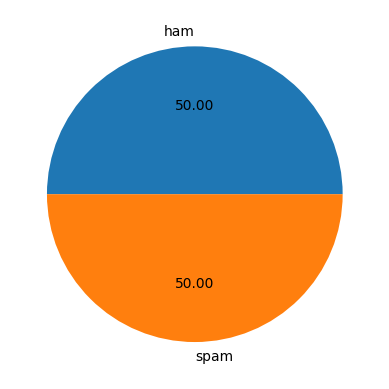

In [17]:
plt.pie(df['category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [18]:
# data is im balanced
import nltk

In [19]:
df['message'].apply(len)

0     31
1     40
3     40
4     33
6     34
7     44
9     59
11    53
12    67
13    41
14    48
16    36
20    46
25    44
34    39
36    44
37    44
40    34
43    58
45    40
Name: message, dtype: int64

In [20]:
df['num_character']=df['message'].apply(len)

In [21]:
df

,category,message,num_character
0,0,Thanks for your help yesterday.,31
1,0,I'll call you in the evening to discuss.,40
3,0,"Hey, are we still on for dinner tonight?",40
4,0,Can you send me the updated file?,33
6,1,Act now! Lowest prices guaranteed.,34
7,1,Exclusive deal just for you. Don’t miss out!,44
9,1,You have been selected for a cash prize. Reply...,59
11,1,Hot singles in your area waiting to chat. Clic...,53
12,1,Congratulations! You've won a $1000 gift card....,67
13,0,Your order has been shipped successfully.,41


In [22]:
import nltk
nltk.download('punkt_tab')
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df

,category,message,num_character,num_words
0,0,Thanks for your help yesterday.,31,6
1,0,I'll call you in the evening to discuss.,40,10
3,0,"Hey, are we still on for dinner tonight?",40,10
4,0,Can you send me the updated file?,33,8
6,1,Act now! Lowest prices guaranteed.,34,7
7,1,Exclusive deal just for you. Don’t miss out!,44,12
9,1,You have been selected for a cash prize. Reply...,59,12
11,1,Hot singles in your area waiting to chat. Clic...,53,12
12,1,Congratulations! You've won a $1000 gift card....,67,16
13,0,Your order has been shipped successfully.,41,7


In [26]:
df['nums_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df

,category,message,num_character,num_words,nums_sentences
0,0,Thanks for your help yesterday.,31,6,1
1,0,I'll call you in the evening to discuss.,40,10,1
3,0,"Hey, are we still on for dinner tonight?",40,10,1
4,0,Can you send me the updated file?,33,8,1
6,1,Act now! Lowest prices guaranteed.,34,7,2
7,1,Exclusive deal just for you. Don’t miss out!,44,12,2
9,1,You have been selected for a cash prize. Reply...,59,12,2
11,1,Hot singles in your area waiting to chat. Clic...,53,12,2
12,1,Congratulations! You've won a $1000 gift card....,67,16,3
13,0,Your order has been shipped successfully.,41,7,1


In [28]:
df[['num_character','num_words','nums_sentences']].describe()

,num_character,num_words,nums_sentences
count,20.000000,20.000000,20.000000
mean,43.750000,9.700000,1.600000
std,9.419325,2.451637,0.598243
min,31.000000,6.000000,1.000000
25%,38.250000,8.000000,1.000000
50%,42.500000,9.500000,2.000000
75%,46.500000,11.250000,2.000000
max,67.000000,16.000000,3.000000


In [29]:
# not spam data
df[df['category']==0][['num_character','num_words','nums_sentences']].describe()

,num_character,num_words,nums_sentences
count,10.000000,10.000000,10.000000
mean,38.300000,8.200000,1.100000
std,4.547282,1.316561,0.316228
min,31.000000,6.000000,1.000000
25%,34.500000,7.250000,1.000000
50%,40.000000,8.000000,1.000000
75%,40.750000,9.000000,1.000000
max,44.000000,10.000000,2.000000


In [30]:
# spam data
df[['num_character','num_words','nums_sentences']].describe()

,num_character,num_words,nums_sentences
count,20.000000,20.000000,20.000000
mean,43.750000,9.700000,1.600000
std,9.419325,2.451637,0.598243
min,31.000000,6.000000,1.000000
25%,38.250000,8.000000,1.000000
50%,42.500000,9.500000,2.000000
75%,46.500000,11.250000,2.000000
max,67.000000,16.000000,3.000000


In [31]:
import seaborn as sns

**  spam   for base on  character  **

<Axes: xlabel='num_character', ylabel='Count'>

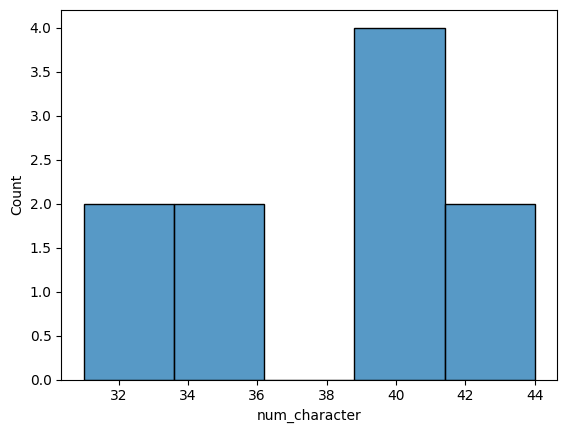

In [32]:
sns.histplot(df[df['category']==0]['num_character'])

**not spam base of character **

<Axes: xlabel='num_character', ylabel='Count'>

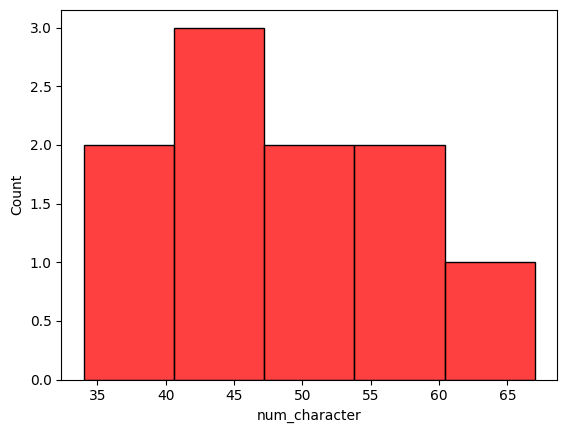

In [33]:
sns.histplot(df[df['category']==1]['num_character'],color='red')

<Axes: xlabel='num_character', ylabel='Count'>

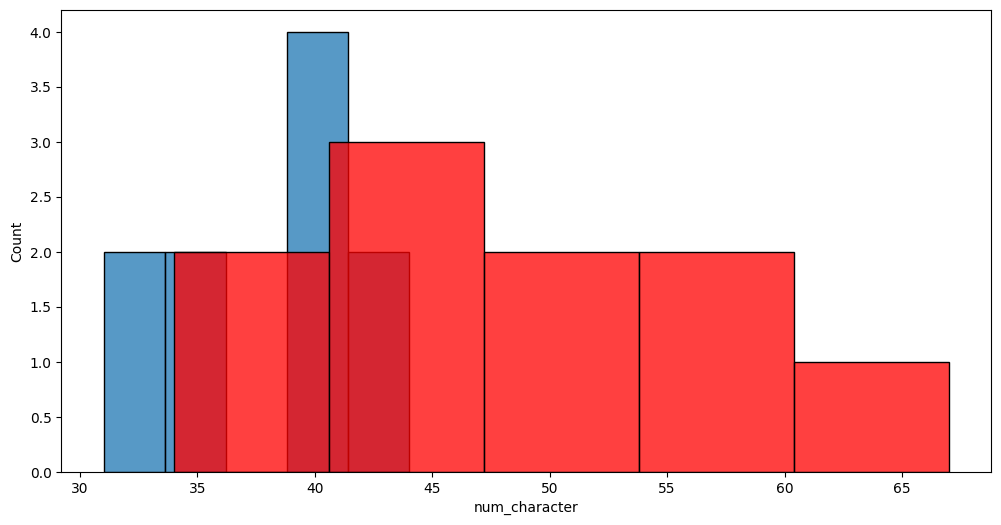

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['category'] == 0]['num_character'])
sns.histplot(df[df['category'] == 1]['num_character'],color='red')

# *** for analysis based on  word ***

<Axes: xlabel='num_words', ylabel='Count'>

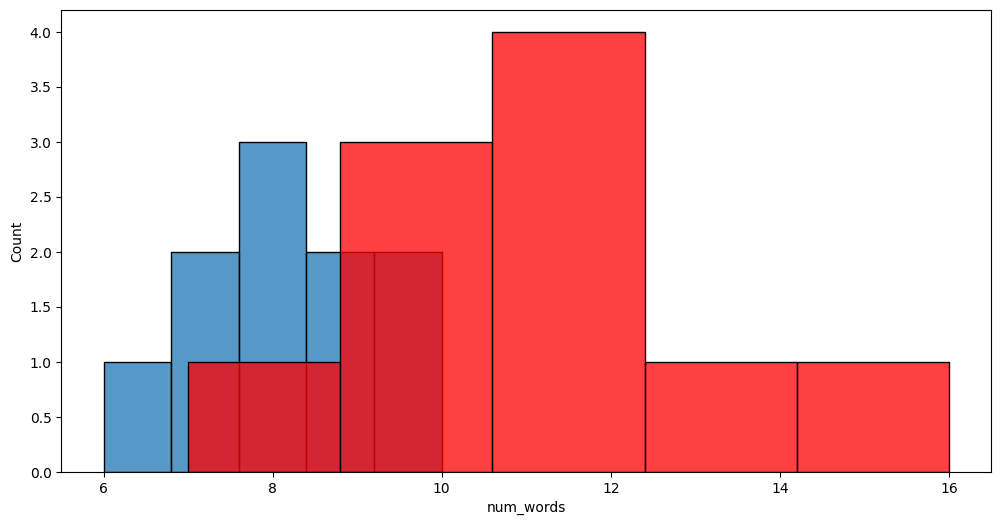

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['category']==0]['num_words'])
sns.histplot(df[df['category']==1]['num_words'],color='red')

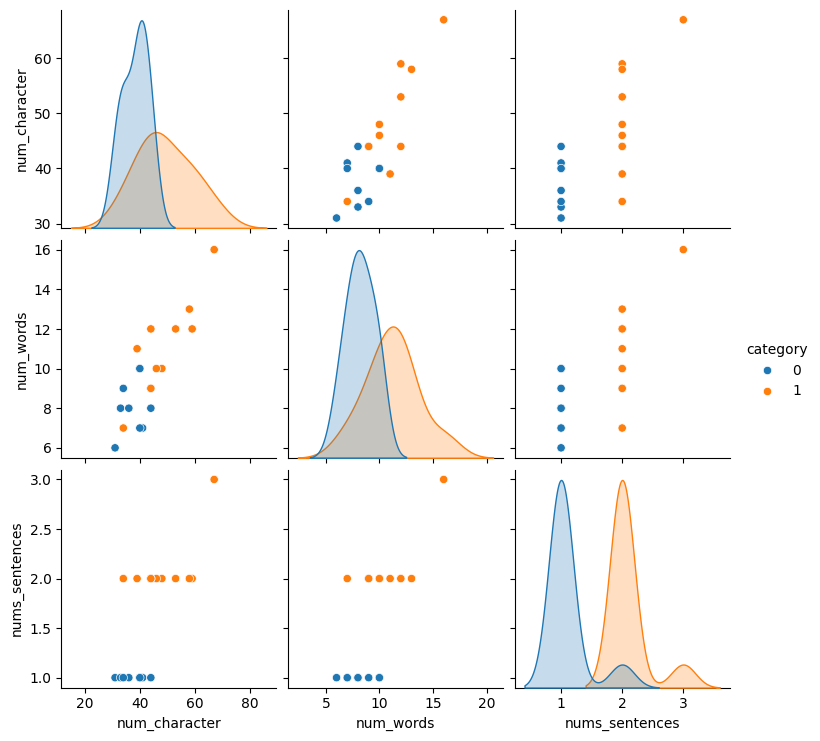

In [36]:
sns.pairplot(df,hue='category')

<Axes: >

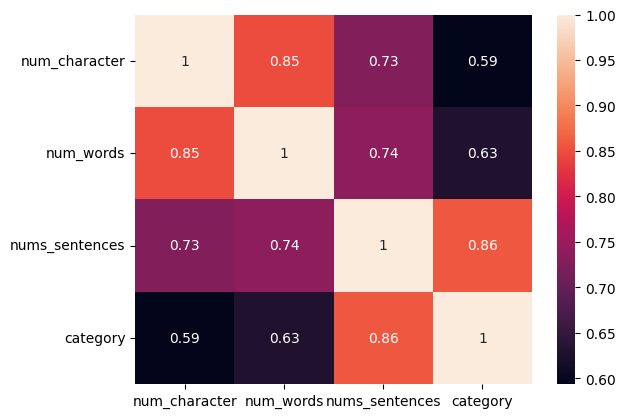

In [37]:
sns.heatmap(df[['num_character','num_words','nums_sentences','category']].corr(),annot=True)

In [38]:
from nltk.corpus import stopwords
import string
def tranform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if(i.isalnum()):
      y.append(i)
  text=y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
    return y

In [39]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
def tranform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if(i.isalnum()):
      y.append(i)
  text=y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def tranform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if(i.isalnum()):
      y.append(i)
  text=y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [42]:
tranform_text(" U dun say so early hor... U c already then say... ")

'u dun say early hor u c already say u dun say earli hor u c alreadi say'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [44]:
df['transformed_text']=df['message'].apply(tranform_text)

In [45]:
df['message'][3]

'Hey, are we still on for dinner tonight?'

In [46]:
df['transform_text']=df['message'].apply(tranform_text)

In [47]:
df.head(5)

,category,message,num_character,num_words,nums_sentences,transformed_text,transform_text
0,0,Thanks for your help yesterday.,31,6,1,thanks help yesterday thank help yesterday,thanks help yesterday thank help yesterday
1,0,I'll call you in the evening to discuss.,40,10,1,call evening discuss call even discuss,call evening discuss call even discuss
3,0,"Hey, are we still on for dinner tonight?",40,10,1,hey still dinner tonight hey still dinner tonight,hey still dinner tonight hey still dinner tonight
4,0,Can you send me the updated file?,33,8,1,send updated file send updat file,send updated file send updat file
6,1,Act now! Lowest prices guaranteed.,34,7,2,act lowest prices guaranteed act lowest price ...,act lowest prices guaranteed act lowest price ...


In [48]:
df.head(1)

,category,message,num_character,num_words,nums_sentences,transformed_text,transform_text
0,0,Thanks for your help yesterday.,31,6,1,thanks help yesterday thank help yesterday,thanks help yesterday thank help yesterday


In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc= wc.generate(df[df['category']==1]['transform_text'].str.cat(sep=""))

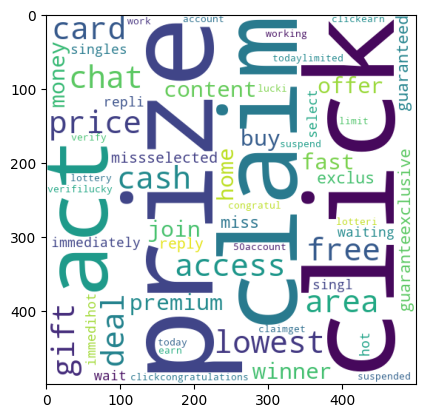

In [51]:
plt.imshow(spam_wc)

In [52]:
Notspam_wc= wc.generate(df[df['category']==0]['transform_text'].str.cat(sep=""))

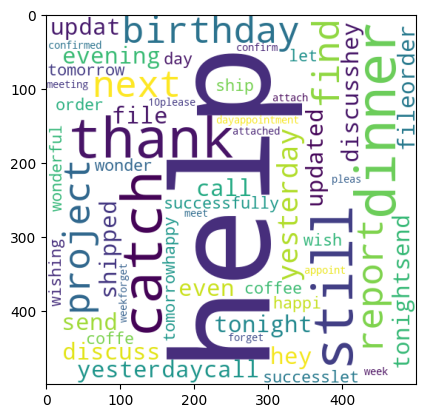

In [53]:
plt.imshow(Notspam_wc)

In [54]:
df.head(10)

,category,message,num_character,num_words,nums_sentences,transformed_text,transform_text
0,0,Thanks for your help yesterday.,31,6,1,thanks help yesterday thank help yesterday,thanks help yesterday thank help yesterday
1,0,I'll call you in the evening to discuss.,40,10,1,call evening discuss call even discuss,call evening discuss call even discuss
3,0,"Hey, are we still on for dinner tonight?",40,10,1,hey still dinner tonight hey still dinner tonight,hey still dinner tonight hey still dinner tonight
4,0,Can you send me the updated file?,33,8,1,send updated file send updat file,send updated file send updat file
6,1,Act now! Lowest prices guaranteed.,34,7,2,act lowest prices guaranteed act lowest price ...,act lowest prices guaranteed act lowest price ...
7,1,Exclusive deal just for you. Don’t miss out!,44,12,2,exclusive deal miss exclus deal miss,exclusive deal miss exclus deal miss
9,1,You have been selected for a cash prize. Reply...,59,12,2,selected cash prize reply immediately select c...,selected cash prize reply immediately select c...
11,1,Hot singles in your area waiting to chat. Clic...,53,12,2,hot singles area waiting chat click hot singl ...,hot singles area waiting chat click hot singl ...
12,1,Congratulations! You've won a $1000 gift card....,67,16,3,congratulations 1000 gift card click claim con...,congratulations 1000 gift card click claim con...
13,0,Your order has been shipped successfully.,41,7,1,order shipped successfully order ship success,order shipped successfully order ship success


In [55]:
spam_corpus = []
for msg in df[df['category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
len(spam_corpus)

100

In [57]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))
##

,0,1
0,click,6
1,prize,4
2,claim,4
3,get,4
4,act,2
5,lowest,2
6,deal,2
7,miss,2
8,cash,2
9,hot,2


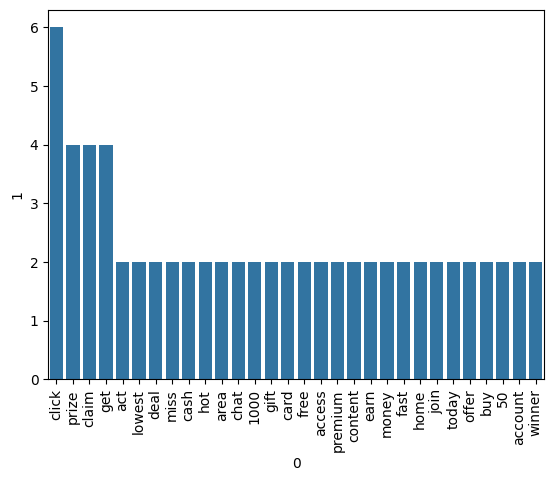

In [58]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []
for msg in df[df['category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

74

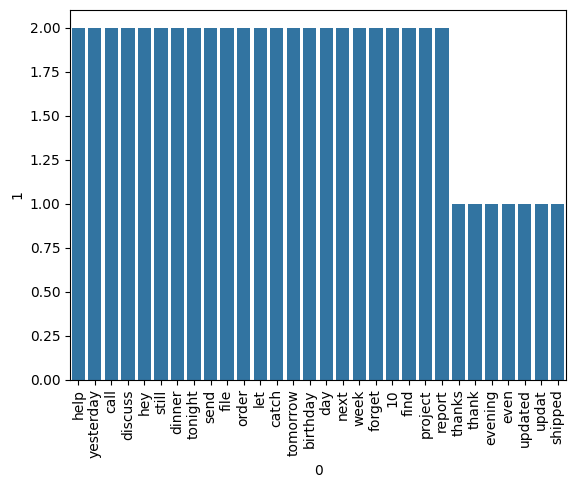

In [61]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df.head(5)

,category,message,num_character,num_words,nums_sentences,transformed_text,transform_text
0,0,Thanks for your help yesterday.,31,6,1,thanks help yesterday thank help yesterday,thanks help yesterday thank help yesterday
1,0,I'll call you in the evening to discuss.,40,10,1,call evening discuss call even discuss,call evening discuss call even discuss
3,0,"Hey, are we still on for dinner tonight?",40,10,1,hey still dinner tonight hey still dinner tonight,hey still dinner tonight hey still dinner tonight
4,0,Can you send me the updated file?,33,8,1,send updated file send updat file,send updated file send updat file
6,1,Act now! Lowest prices guaranteed.,34,7,2,act lowest prices guaranteed act lowest price ...,act lowest prices guaranteed act lowest price ...


# ***Model Building ***

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(20, 111)

In [66]:
y = df['category'].values


In [67]:
y.shape

(20,)

In [68]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score 

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='weighted'))

1.0
[[373   0]
 [  0 227]]
1.0


In [83]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='weighted'))

1.0
[[373   0]
 [  0 227]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='weighted'))

1.0
[[373   0]
 [  0 227]]
1.0


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [89]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  1.0
Precision -  1.0
For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  1.0
Precision -  1.0
For  DT
Accuracy -  0.9316666666666666
Precision -  1.0
For  LR
Accuracy -  1.0
Precision -  1.0
For  RF
Accuracy -  1.0
Precision -  1.0
For  AdaBoost
Accuracy -  1.0
Precision -  1.0
For  BgC
Accuracy -  1.0
Precision -  1.0
For  ETC
Accuracy -  1.0
Precision -  1.0
For  GBDT
Accuracy -  1.0
Precision -  1.0
For  xgb
Accuracy -  1.0
Precision -  1.0


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [92]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,1.000000,1.0
1,KN,1.000000,1.0
2,NB,1.000000,1.0
3,DT,0.931667,1.0
4,LR,1.000000,1.0
5,RF,1.000000,1.0
6,AdaBoost,1.000000,1.0
7,BgC,1.000000,1.0
8,ETC,1.000000,1.0
9,GBDT,1.000000,1.0


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,1.000000
1,KN,Accuracy,1.000000
2,NB,Accuracy,1.000000
3,DT,Accuracy,0.931667
4,LR,Accuracy,1.000000
5,RF,Accuracy,1.000000
6,AdaBoost,Accuracy,1.000000
7,BgC,Accuracy,1.000000
8,ETC,Accuracy,1.000000
9,GBDT,Accuracy,1.000000


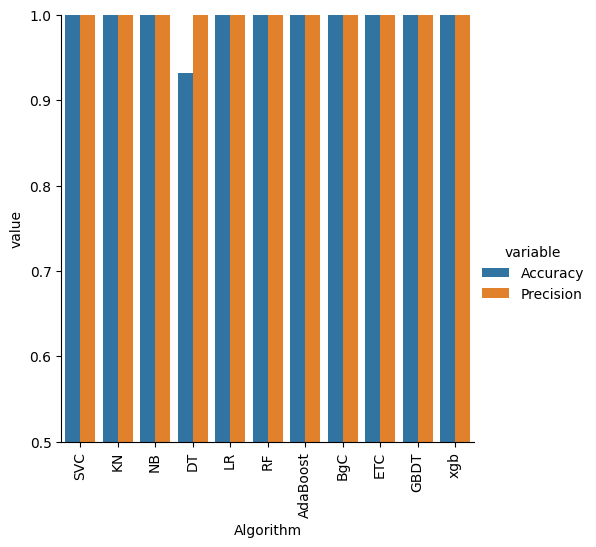

In [95]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

*** model improvement ***

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [99]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [100]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,SVC,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
1,KN,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
2,NB,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
3,DT,0.931667,1.0,0.931667,1.0,0.931667,1.0,0.931667,1.0
4,LR,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
5,RF,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
6,AdaBoost,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
7,BgC,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
8,ETC,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
9,GBDT,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0


In [102]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [106]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [108]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))